# Week 4 - Partial Least Squares Regression

In [2]:
import scipy as sp, numpy as np
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import LeaveOneGroupOut, LeaveOneOut
import matplotlib.pyplot as plt
import scipy.io

data = sp.io.loadmat('wk4_Cosgrove-data.mat', squeeze_me=True)['s']

X = data['X'].item() # the untransformed data matrix (66x102)
Y = data['Y'].item() # the untransformed LDH release at 48hours. (66x1)
phosphoproteins = data['phosphoproteins'].item() # names of phosphoproteins
conditions = data['conditions'].item() # cell array of the 66 conditions
drugList = data['drugList'].item() # description of the drugs used in each of the 66 conditions
drugListToxic = data['drugListToxic'].item() # binary value corresponding to whether drugList[i] is toxic
drugs = data['drugs'].item() # binary matrix mapping which measurements correspond to a drug treatment in drugList
cytokineList = data['cytokineList'].item() # cell array of cytokine treatments
ind4pProtein = data['ind4pProtein'].item() # the column indices corresponding to measurements of the 4 phosphoprotein subset

#### (1) Perform PLSR on the matrixes X and Y. Plot the percent variance explained. How many principal components do you need for each to explain 90% of the variance? Discuss your findings.

Hint: Be sure to normalize each dataset as needed for the analysis.

Principal Component:  4


C:\Users\bened\Anaconda33\lib\site-packages\sklearn\cross_decomposition\_pls.py:321: UserWarning: Y residual constant at iteration 65
  warnings.warn('Y residual constant at iteration %s' % k)


Text(0, 0.5, 'Variance Explained')

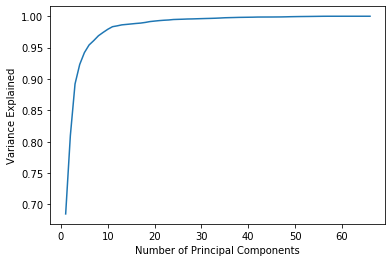

In [5]:
# Answer
from scipy.stats import zscore
from sklearn.preprocessing import scale
a = np.zeros(66)
xz = scale(X)
yz = scale(Y)
hold = 0

for i in range(1,67):
    PLSR = PLSRegression(n_components = i)
    PLSR.fit_transform(xz,yz[:,4])
    a[i-1] = PLSR.score(xz,yz[:,4])
    if a[i-1] > 0.9 and a[i-1] <0.94:
        hold = i

print("Principal Component: ", hold)
    
plt.plot(np.arange(1,67), a)
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')

To explain 90% of the variance, we need 4 principal components. Too much principal component will defeat the purpose of using PLSR in the first place, and too few components won't give you enough information to be able to predict the data.

#### (2) Recreate the Figure S2A plot from Cosgrove et al. supplementary information. This is the PLSR scores plot (for PC1 and PC2), with toxic drugs colored according to the drug type and all other drugs are not colored. Use the drugList, drugListToxic to identify these categories.

['DMSO' 'CIM' 'RAN' 'LEV' 'TRO' 'BUS' 'NEF' 'ASP' 'NIM' 'CLA' 'TEL']
[0 0 1 0 1 0 1 0 1 1 1]
[[-4.07401555 -1.12762701 -3.29868513  3.52241909]
 [-3.88560227 -0.06118285  2.14063687  1.35400078]
 [-4.62934541 -0.88130313 -2.11604682  2.90709114]
 [-3.09753324 -2.02348053  0.43087806  1.14674979]
 [-4.02772738 -0.64143472 -0.18365448 -0.08437518]
 [-3.29449629  3.53823483  4.00935854  0.23995272]
 [-4.90149478 -4.61461214 -1.85892875  1.47473822]
 [-4.20785583 -2.07414533  2.01818074 -0.01709515]
 [-3.80984591 -1.54991827 -2.10143372  1.14822256]
 [-3.94756787 -1.94410177  1.2741635   1.60589521]
 [-4.12733094  0.99739835 -0.55861608 -1.32792305]
 [-4.78934387  5.93458153  5.23287273  1.0092204 ]
 [-4.22179258 -1.79831781 -1.78799237  1.24912644]
 [-4.22780001 -0.95118445  3.02114293  0.27573927]
 [-5.63862134 -0.3368916  -0.41914572  2.34591711]
 [-2.69788317 -0.3584307  -0.65704863  2.13381057]
 [-5.550479    1.26985438  0.10405828  0.46909655]
 [-3.85037798  2.71857616  4.2311561  -0

Text(0.5, 1.0, 'PLSR Model Scores')

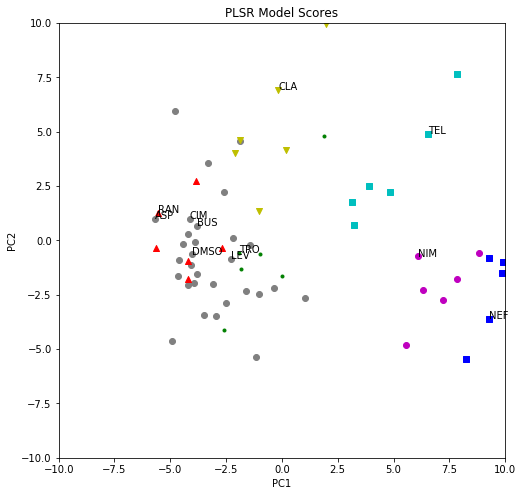

In [6]:
# Answer
print (drugList)
print(drugListToxic)
PLSR = PLSRegression(n_components = 4)
scorex, scorey = PLSR.fit_transform(xz, yz[:,4])
plt.figure(figsize=(8,8))
plt.xlim(-10, 10)
plt.ylim(-10, 10)
col = ['r','g','b','m','y','c']
m = ['^','.',',','o','v','s']
count = 0



for i, label in enumerate(drugList):
    if drugListToxic[i] == 1: #if it's toxic
        for n in range(0,6):
            plt.scatter(scorex[n+6*i,0],scorex[n+6*i,1], c = col[count], marker = m[count])
        count = count + 1
    elif drugListToxic[i] == 0:
        for n in range(0,6):
            plt.scatter(scorex[n+6*i,0], scorex[n+6*i,1], c='gray')
    plt.annotate(str(label),(scorex[n+6*i-1,0],scorex[n+6*i-1,1]))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PLSR Model Scores')

#### (3) Create the loadings plot corresponding to (2). Interpret the results shown on the plot.

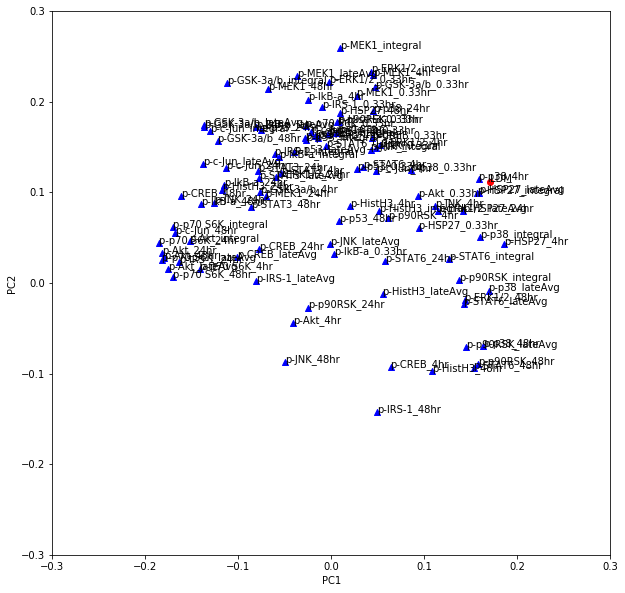

In [29]:
# Answer
xloadscores, yloadscores = PLSR.x_loadings_, PLSR.y_loadings_
plt.figure(figsize=(10,10))
plt.xlim(-0.3, 0.3)
plt.ylim(-0.3, 0.3)
plt.scatter(xloadscores[:, 0], xloadscores[:, 1], c='b', marker='^')
plt.scatter(yloadscores[:, 0], yloadscores[:, 1], c='r', marker='o')
plt.xlabel("PC1")
plt.ylabel("PC2")

for i, label in enumerate(phosphoproteins):
    plt.annotate(label, (xloadscores[i, 0], xloadscores[i, 1]))
plt.annotate('LDM', (yloadscores[:, 0], yloadscores[:, 1]));


This shows that p-38_4hr is the most correlated drug that contribute to the death of cells

#### (4) Recreate a 4-principal component model using PLSR with just the final 4 phosphoprotein model. Plot predicted v. observed LDH for this model. Report the model fitness ($R^2$). Define here how you are calculating $R^2$.

The R^2 value is 0.8821898904528919


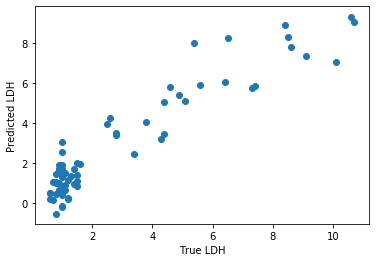

In [3]:
# Answer
PLSRmodel = PLSRegression(n_components=4)
PLSRmodel.fit_transform(X[:,ind4pProtein], Y[:,4])

x4 = X[:,ind4pProtein]
predict = PLSRmodel.predict(x4)

plt.scatter(Y[:,4], predict)
plt.xlabel("True LDH")
plt.ylabel("Predicted LDH")

print("The R^2 value is",PLSRmodel.score(x4,Y[:,4]))

I used the function PLSRmodel.score() to return the R^2 value of how close I am to the true data. Mathematically, you would need to compute 1-{(sum of predicted-observed squared) / (sum of observed squared * average)}

#### (6) Cosgrove *et al* discusses their method for model validation using leave-one-out cross-validation. Calculate all LDH predictions for leave-one-out cross-validation and calculate the R^2 value for the resulting yfit values. What is the R^2 value? Why do you think it’s important to perform cross-validation?

The R^2 value for the resulting yfit value is 0.9247440869680479


Text(0.5, 1.0, 'Leave-One-Out Cross Validation')

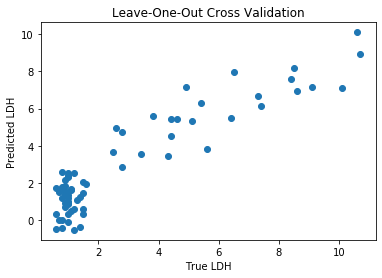

In [9]:
# Answer
looi = np.arange(len(X))
hold = np.zeros(len(X))
leave = LeaveOneOut()
for train_index, test_index in leave.split(looi):
    trainX = X[train_index]
    trainY = Y[train_index,4]
    PLS = PLSRegression(n_components = 4)
    PLS.fit_transform(trainX, trainY)
    hold[test_index] = PLS.predict(X[test_index])

R2Y = 1 - np.sum((hold - Y[:,4])**2) / np.sum((Y[:,4])**2)
print ("The R^2 value for the resulting yfit value is", R2Y)
plt.scatter(Y[:,4],hold)
plt.xlabel("True LDH")
plt.ylabel("Predicted LDH")
plt.title("Leave-One-Out Cross Validation")

The R^2 value represent how accurate your model is according to LOOCV. The closer the value is to 1, the better it is.

It is important to perform cross-validation to check how good our model is with predictions.

#### (7) Now, instead of performing LOOCV, let's perform leave-one-cytokine-out cross-validation. That is, one cytokine at a time, leave out all the data for the `NoCyt`, `IL-1`, `LPS`, `TNF`, `IL-6`, or `Mix` conditions.

Hint: Look at `sklearn.model_selection.LeaveOneGroupOut`.

How does this affect your cross-validation? How do the two approaches here differ? When might each be most appropriate?

The R^2 value is 0.9319705260621478


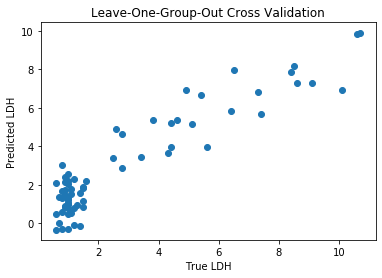

In [10]:
# Answer
LOGO = LeaveOneGroupOut()

grouphold = np.zeros(X.shape[0])
for i in range(0,len(grouphold)):
    if i%6 == 0:
        grouphold[i] = 0
    elif i%6 == 1:
        grouphold[i] = 1
    elif i%6 == 2:
        grouphold[i] = 2
    elif i%6 == 3:
        grouphold[i] = 3
    elif i%6 == 4:
        grouphold[i] = 4
    elif i%6 == 5:
        grouphold[i] = 5
    
    
for train_index, test_index in LOGO.split(X, Y, grouphold):
    trainX, testX = X[train_index], X[test_index]
    trainY = Y[train_index,4]
    PLSfun = PLSRegression(n_components = 4)
    trainedmod = PLSfun.fit_transform(trainX, trainY)
    hold[test_index] = np.squeeze(PLSfun.predict(testX))
    
plt.scatter(Y[:,4],hold)
plt.xlabel("True LDH")
plt.ylabel("Predicted LDH")
plt.title("Leave-One-Group-Out Cross Validation")
    
R2Y = 1 - np.sum((hold - Y[:,4])**2) / np.sum((Y[:,4])**2)
print ("The R^2 value is", R2Y)

It affects the cross-validation by making the prediction even closer to the true because we can see a higher R^2 value compared to Leave-One-Out Cross Validation. 

The two approaches differ when it splits. LOOCV leaves one data out to be tested after the model has been trained, whereas LOGOCV leaves one group of data out to be tested.

It would be most appropriate to use LOGOCV when your data is not 'subjective', meaning, it's not grouped in a certain case. Because if you do so, then the model won't do well in predicting data that are not part of your subjectivity.